# ***Wczytanie pliku i bibliotek***


In [1]:
git clone 

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import time
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import boxcox
from sklearn.linear_model import Ridge
from sklearn import linear_model


In [ ]:

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.diagnostic as dg
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from datetime import date, timedelta
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [ ]:
data = pd.read_csv("drive/MyDrive/Colab Notebooks/case.csv")
data.head()
data2 = data.copy()
data2.head()

,y,x1,x2,x3,x4,x5
0,NaN,2.456,4.00,1386.96,6.4,406426
1,104.7474,2.837,4.04,1462.59,4.4,405948
2,104.8129,2.578,3.56,1736.47,4.6,405466
3,104.4135,2.793,3.13,1688.85,18.0,403957
4,104.4852,3.283,3.10,1822.57,4.4,400415


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       274 non-null    float64
 1   x1      275 non-null    float64
 2   x2      275 non-null    float64
 3   x3      275 non-null    float64
 4   x4      275 non-null    float64
 5   x5      275 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.0 KB


y - INDRO

x1 - MGASUSGULF

x2 - GS30

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       274 non-null    float64
 1   x1      275 non-null    float64
 2   x2      275 non-null    float64
 3   x3      275 non-null    float64
 4   x4      275 non-null    float64
 5   x5      275 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.0 KB


In [ ]:
data.shape

(275, 6)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
y,274.0,96.864250,4.975902,84.7277,92.801525,98.2017,101.0015,104.8129
x1,275.0,1.775498,0.734485,0.5010,1.199500,1.7020,2.3050,4.0490
x2,275.0,3.842655,1.219188,1.2700,2.895000,3.7900,4.8500,6.6300
x3,275.0,2169.204364,562.837890,1017.8000,1780.335000,2233.3700,2438.6650,3812.5500
x4,275.0,18.167636,10.934924,-18.6000,11.050000,18.9000,25.4500,41.2000
x5,275.0,202433.625455,62477.509237,115232.0000,152395.000000,190174.0000,243584.5000,406426.0000


In [ ]:
data.isnull().sum()

y     1
x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

In [ ]:
data.dropna(inplace = True)

# ***Badanie właściwości szeregu czasowego***

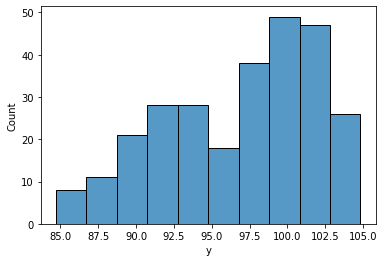

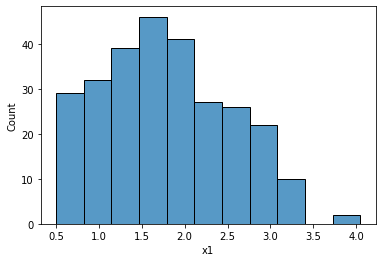

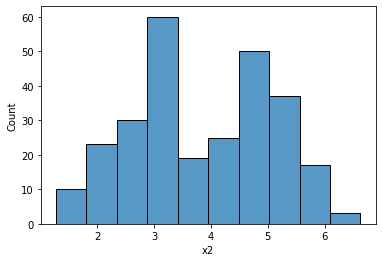

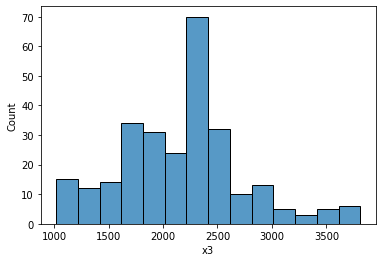

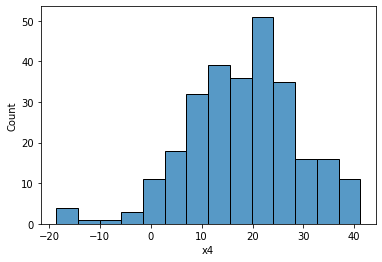

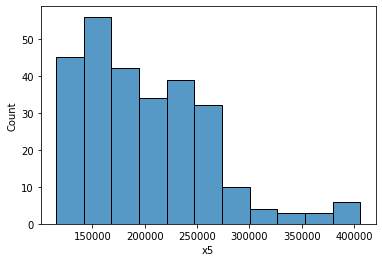

In [ ]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.histplot(x=col, data=data)

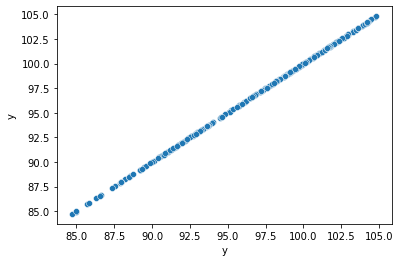

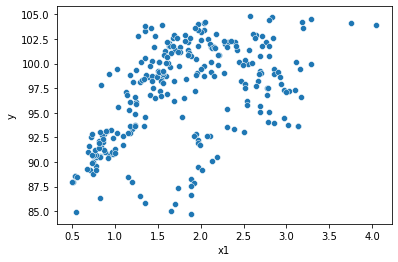

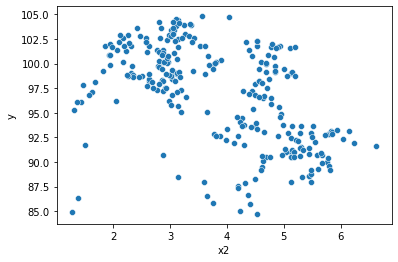

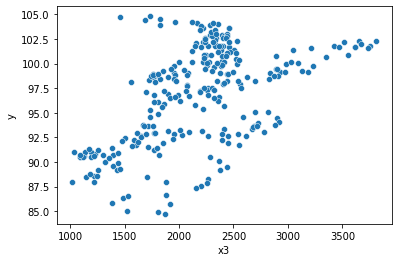

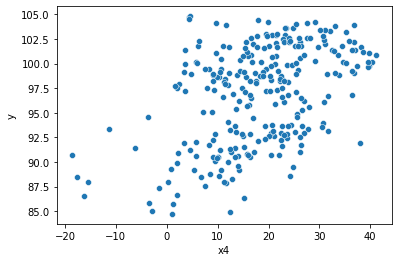

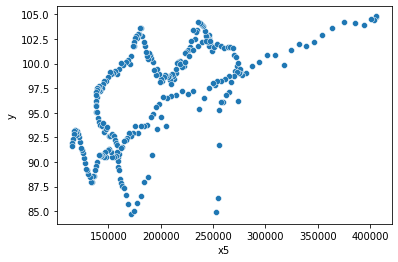

In [ ]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.scatterplot(x=col,y = "y", data=data)


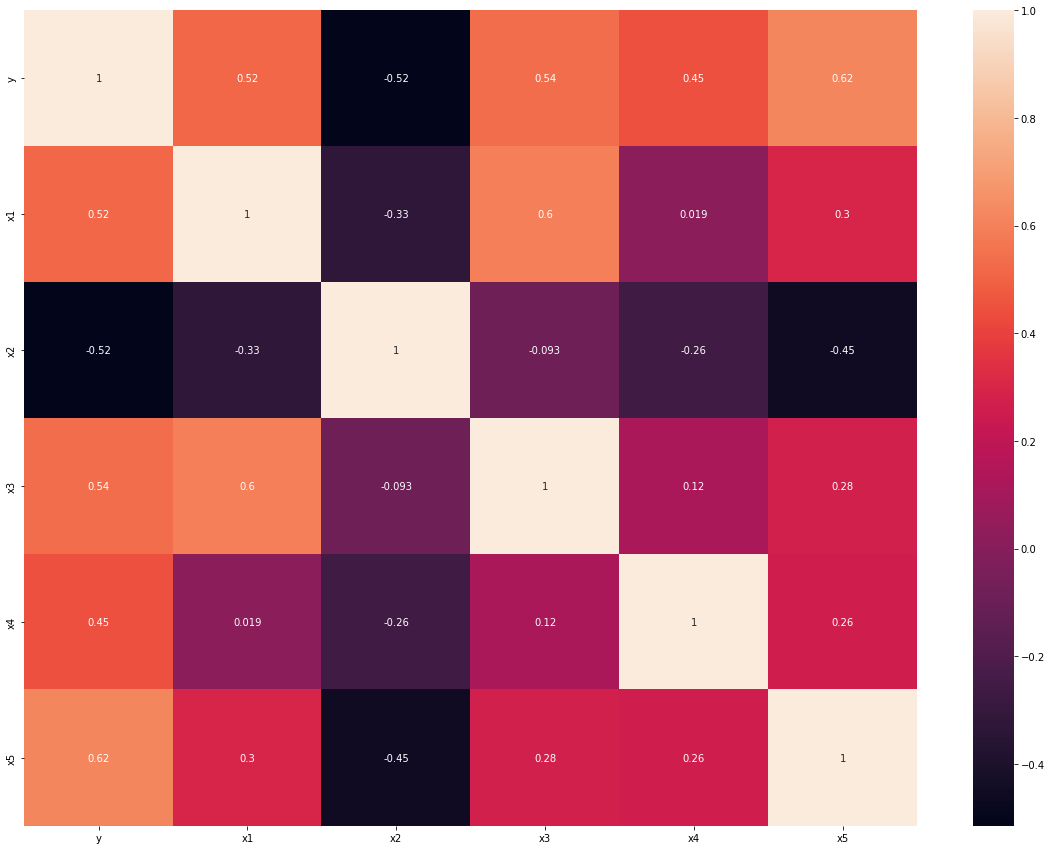

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,robust = True)

## ***Badanie stacjonarności***

In [ ]:
def get_stationarity(series):
    

    # rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(series, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    statistic, p_value, n_lags, critical_values = kpss(series)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
      print('Critial Values:')
      print(f'   {key}, {value}')   
   


Statistics for 0 variable:


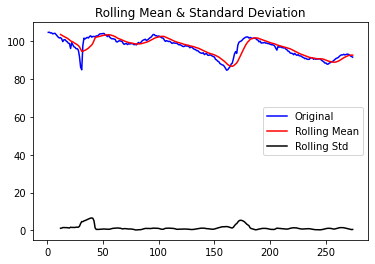

KPSS Statistic: 0.856082623869788

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
ADF Statistic: -2.13481573391683
n_lags: 0.23074735363671828
p-value: 0.23074735363671828
Critial Values:
   1%, -3.4547128138328875
Critial Values:
   5%, -2.8722649771800155
Critial Values:
   10%, -2.5724850011573914
Statistics for 1 variable:


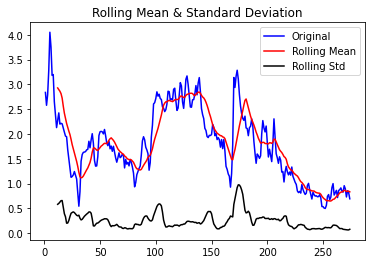

KPSS Statistic: 0.5675311432348308
p-value: 0.02645694972188495
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
ADF Statistic: -2.8867070263531964
n_lags: 0.0469157698526416
p-value: 0.0469157698526416
Critial Values:
   1%, -3.4546223782586534
Critial Values:
   5%, -2.8722253212300277
Critial Values:
   10%, -2.5724638500216264
Statistics for 2 variable:


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


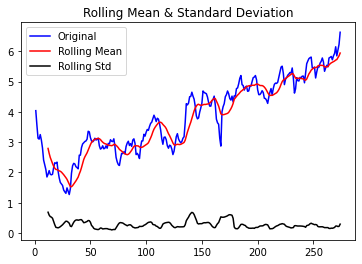

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


KPSS Statistic: 1.5912709624254204
p-value: 0.01
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
ADF Statistic: -0.5766601052472518
n_lags: 0.8761691560609199
p-value: 0.8761691560609199
Critial Values:
   1%, -3.4547128138328875
Critial Values:
   5%, -2.8722649771800155
Critial Values:
   10%, -2.5724850011573914
Statistics for 3 variable:


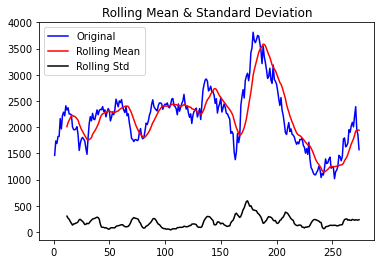

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS Statistic: 0.2502092173314179
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
ADF Statistic: -2.15787670099703
n_lags: 0.221887269453362
p-value: 0.221887269453362
Critial Values:
   1%, -3.45453261164607
Critial Values:
   5%, -2.8721859575020017
Critial Values:
   10%, -2.572442854861866
Statistics for 4 variable:


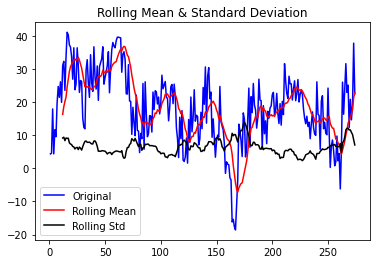

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


KPSS Statistic: 0.5327506641886439
p-value: 0.03429039094850362
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
ADF Statistic: -3.4448650773006992
n_lags: 0.009521256634895225
p-value: 0.009521256634895225
Critial Values:
   1%, -3.4547128138328875
Critial Values:
   5%, -2.8722649771800155
Critial Values:
   10%, -2.5724850011573914
Statistics for 5 variable:


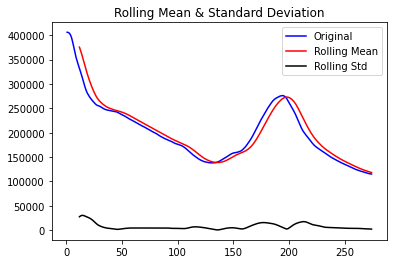

KPSS Statistic: 0.7002877266334916
p-value: 0.01351929757877349
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary
ADF Statistic: -1.6185590903964977
n_lags: 0.473484792172112
p-value: 0.473484792172112
Critial Values:
   1%, -3.4557539868570775
Critial Values:
   5%, -2.8727214497041422
Critial Values:
   10%, -2.572728476331361


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [ ]:
for i, col in enumerate(data.columns):
  print(f'Statistics for {i} variable:')
  get_stationarity(data[col])

In [ ]:
for i,col in enumerate(data.columns):
   print(f'Statistics for {i} variable:')
   print(sm.stats.acorr_ljungbox(data[col], lags=[1], return_df=True, boxpierce = True))

Statistics for 0 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  259.506116  2.198728e-58  256.685397  9.058116e-58
Statistics for 1 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  252.377223  7.873961e-57  249.633992  3.120563e-56
Statistics for 2 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  265.097374  1.328774e-59  262.215881  5.643062e-59
Statistics for 3 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  256.899601  8.134755e-58  254.107214  3.304141e-57
Statistics for 4 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  154.995527  1.403367e-35  153.310793  3.276046e-35
Statistics for 5 variable:
      lb_stat     lb_pvalue     bp_stat     bp_pvalue
1  263.348869  3.195657e-59  260.486382  1.344302e-58


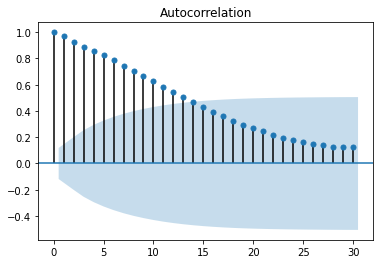

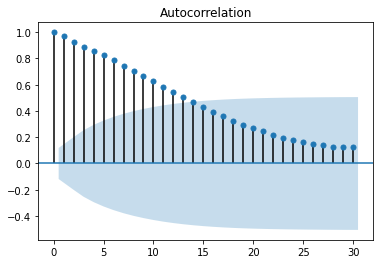

In [ ]:
plot_acf(data["y"], lags=30)

In [ ]:
df_log = np.log(data["y"])
df_log

1      4.651552
2      4.652177
3      4.648359
4      4.649045
5      4.643875
         ...   
270    4.534340
271    4.531386
272    4.525172
273    4.521382
274    4.517716
Name: y, Length: 274, dtype: float64

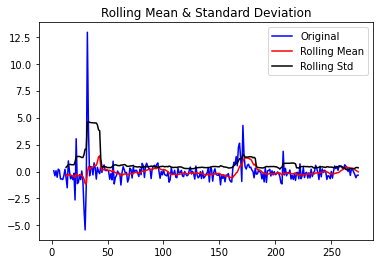

KPSS Statistic: 0.03759932688483099
p-value: 0.1
num lags: 16
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
ADF Statistic: -12.315168381522655
n_lags: 6.94817325499645e-23
p-value: 6.94817325499645e-23
Critial Values:
   1%, -3.4547128138328875
Critial Values:
   5%, -2.8722649771800155
Critial Values:
   10%, -2.5724850011573914


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
df_shift = data["y"] - data["y"].shift()
df_shift.dropna(inplace=True)
get_stationarity(df_shift)

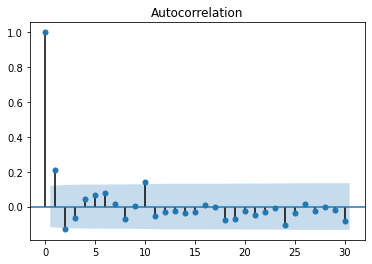

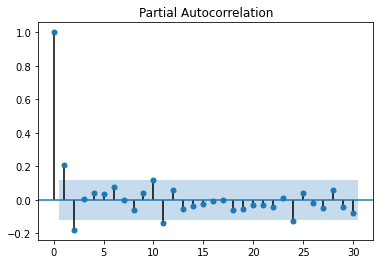

In [ ]:
plot_acf(df_shift, lags=30)
pacf_values = plot_pacf(df_shift,lags = 30)

# ***AR***

In [ ]:
#
# Create training and test data
#
train_data = df_shift[:len(df_shift)-100]
test_data = df_shift[len(df_shift)-100:]

# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())



                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  173
Model:                     AutoReg(1)   Log Likelihood                -293.529
Method:               Conditional MLE   S.D. of innovations              1.333
Date:                Fri, 27 Jan 2023   AIC                              0.610
Time:                        11:11:28   BIC                              0.665
Sample:                             1   HQIC                             0.632
                                  173                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0209      0.102     -0.206      0.837      -0.220       0.178
y.L1           0.2214      0.074      2.977      0.003       0.076       0.367
                                    Roots           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [ ]:
print(sm.stats.acorr_ljungbox(df_shift, lags=[1], return_df=True, boxpierce = True))

     lb_stat  lb_pvalue    bp_stat  bp_pvalue
1  12.096157   0.000505  11.964199   0.000542


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


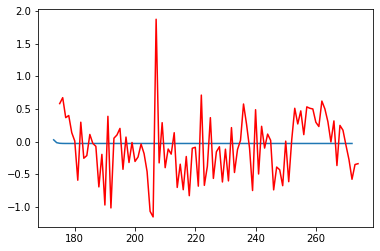

In [ ]:
pred = ar_model.predict(start=len(train_data), end=(len(df_shift)-1), dynamic=False)
#
# Plot the prediction vs test data
#
plt.plot(pred)
plt.plot(test_data, color='red')

# ***KMNK***

In [ ]:
x = data.drop(["y"], axis = 1)
y = data["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

## ***Przed walidacją***

In [ ]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           8.00e-63
Time:                        11:12:20   Log-Likelihood:                -675.14
No. Observations:                 274   AIC:                             1362.
Df Residuals:                     268   BIC:                             1384.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.2484      1.257     67.825      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(x_train,y_train)
y_pred = linreg_model.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:",rmse)
print(f'R^2 for training data is = {linreg_model.score(x_train,y_train).round(4)}')
print(f'R^2 for test data is = {linreg_model.score(x_test,y_test).round(4)}')
print(f'Independent term:{linreg_model.intercept_} Estimated coefficients:{linreg_model.coef_}')


RMSE: 2.505
R^2 for training data is = 0.6557
R^2 for test data is = 0.7331
Independent term:85.33471608108158 Estimated coefficients:[ 1.14533112e+00 -8.91516446e-01  2.74742994e-03  1.16435768e-01
  2.41541621e-05]


## ***Po walidacji***

In [ ]:
scores_test = cross_val_score(linreg_model,x_test,y_test, cv =5 )
print(scores_test)

[0.74251453 0.82306018 0.51733412 0.75489939 0.44537539]


In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model
rfe = RFE(linreg_model)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006545,0.003101,0.001976,0.000202,1,{'n_features_to_select': 1},0.286965,0.249101,0.366259,0.094161,...,0.244969,0.088894,5,0.269027,0.279548,0.249886,0.296441,0.277794,0.274539,0.015189
1,0.004385,0.000164,0.001755,0.000055,2,{'n_features_to_select': 2},0.426955,0.408584,0.582477,0.331448,...,0.374651,0.149582,4,0.399560,0.407186,0.360308,0.412458,0.467672,0.409437,0.034400
2,0.003823,0.000177,0.001745,0.000065,3,{'n_features_to_select': 3},0.662095,0.420393,0.540547,0.441197,...,0.472264,0.122507,3,0.467054,0.540265,0.513310,0.529903,0.568044,0.523715,0.033455
3,0.003838,0.000702,0.002405,0.000402,4,{'n_features_to_select': 4},0.687865,0.472952,0.591617,0.591088,...,0.551095,0.097380,2,0.553966,0.614781,0.589777,0.586576,0.629961,0.595012,0.026060
4,0.003580,0.000253,0.003099,0.002022,5,{'n_features_to_select': 5},0.743412,0.583627,0.665304,0.639337,...,0.617743,0.095406,1,0.618411,0.668098,0.650929,0.653557,0.698481,0.657895,0.025991


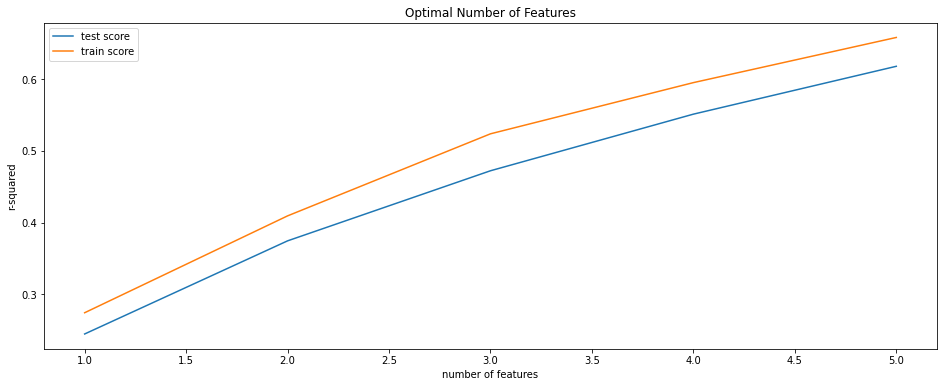

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# ***Regresja wielomianowa***

## ***Przed walidacją***

In [ ]:
X,y = data[["x1","x2","x3","x4","x5"]] , data["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=100)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

poly_reg_y_predicted = poly_reg_model.predict(X_test)
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print("\nMSE:",poly_reg_rmse)
print(f'R^2 for training data is = {poly_reg_model.score(X_train,y_train).round(4)}')
print(f'R^2 for test data is = {poly_reg_model.score(X_test,y_test).round(4)}')



MSE: 2.2094039308760793
R^2 for training data is = 0.8308
R^2 for test data is = 0.7924


## ***Po walidacji***

In [ ]:
scores = cross_val_score(poly_reg_model,X_test,y_test, cv=5 )
print(scores)

[ 0.73529259  0.58508537 -0.12012127  0.70012086  0.50843121]


In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# step-3: perform grid search
# 3.1 specify model
rfe = RFE(poly_reg_model)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005461,0.000413,0.001938,0.000337,1,{'n_features_to_select': 1},0.286965,0.249101,0.366259,0.094161,...,0.244969,0.088894,5,0.269027,0.279548,0.249886,0.296441,0.277794,0.274539,0.015189
1,0.004322,0.000059,0.001715,0.000038,2,{'n_features_to_select': 2},0.426955,0.408584,0.582477,0.331448,...,0.374651,0.149582,4,0.399560,0.407186,0.360308,0.412458,0.467672,0.409437,0.034400
2,0.003861,0.000170,0.001778,0.000166,3,{'n_features_to_select': 3},0.662095,0.420393,0.540547,0.441197,...,0.472264,0.122507,3,0.467054,0.540265,0.513310,0.529903,0.568044,0.523715,0.033455
3,0.004203,0.000858,0.003141,0.001790,4,{'n_features_to_select': 4},0.687865,0.472952,0.591617,0.591088,...,0.551095,0.097380,2,0.553966,0.614781,0.589777,0.586576,0.629961,0.595012,0.026060
4,0.003016,0.000325,0.001926,0.000154,5,{'n_features_to_select': 5},0.743412,0.583627,0.665304,0.639337,...,0.617743,0.095406,1,0.618411,0.668098,0.650929,0.653557,0.698481,0.657895,0.025991


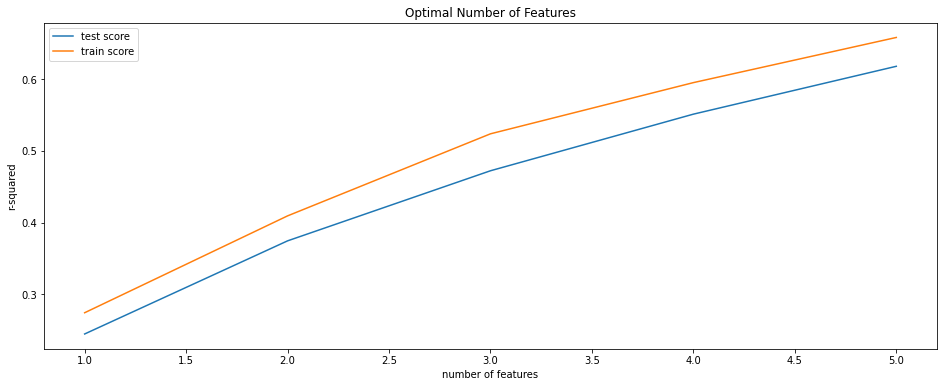

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Źródła:
1.   https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression
2.   https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
3. "Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow by Aurelien Geron(O'Reilly). Copyright 2019 Aurelien Geron, 978-1-492-03264-9"
4. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
5. https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7




